## Cooperation Analysis
a)Assist b)Counterattack c)Counterpressing recovery d)Covering teammate e)Link-up Play f)Off-ball movement g)Pass into final third/penalty area h)Smart pass/Through pass

In [1]:
import sys
import os
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
from config.config_params import ROOT_DIR
from src.data_loading.data_load_save_utils import filter_match_ids_for_team
from src.wyscout_utils  import Wyscout


In [3]:
denmark_game =filter_match_ids_for_team('Denmark')
all_game = pd.read_csv(f"{ROOT_DIR}/data/matchids.csv")
denmark_game.head()
all_game.head()

wyscout  skillcorner        date             home result              away
0  5414103          NaN  2023-03-23       Kazakhstan    1-2          Slovenia
1  5414104          NaN  2023-03-23            Italy    1-2           England
2  5414105          NaN  2023-03-23  North Macedonia    2-1             Malta
3  5414106          NaN  2023-03-23          Denmark    3-1           Finland
4  5414107          NaN  2023-03-23       San Marino    0-2  Northern Ireland

In [4]:
wys_data=pd.DataFrame()
wys_data_all=pd.DataFrame()
for index,row in denmark_game.iterrows():
    wys_id = row['wyscout']
    wys_data_id = Wyscout(wys_id,tuple(row[['home','away','date']])).events_df
    wys_data = pd.concat([wys_data,wys_data_id],axis=0)
for index,row in all_game.iterrows():
    wys_id = row['wyscout']
    wys_data_id = Wyscout(wys_id,tuple(row[['home','away','date']])).events_df
    wys_data_all = pd.concat([wys_data_all,wys_data_id],axis=0)
wys_data_all['type.primary'].head(5)


Wyscout data for match 5414106 unzipped ...
-- See path: C:\Users\xin22\Documents\ETH1+\soccer\h5-soccer-analytics-codebase\h5_data\Denmark_Finland_2023-03-23\wyscout\json_files
Skillcorner data for match 5414106 loaded ...
Match: Denmark vs Finland on 2023-03-23
Wyscout data for match 5414155 unzipped ...
-- See path: C:\Users\xin22\Documents\ETH1+\soccer\h5-soccer-analytics-codebase\h5_data\Denmark_Northern Ireland_2023-06-16\wyscout\json_files
Skillcorner data for match 5414155 loaded ...
Match: Denmark vs Northern Ireland on 2023-06-16
Wyscout data for match 5414202 unzipped ...
-- See path: C:\Users\xin22\Documents\ETH1+\soccer\h5-soccer-analytics-codebase\h5_data\Denmark_San Marino_2023-09-07\wyscout\json_files
Skillcorner data for match 5414202 loaded ...
Match: Denmark vs San Marino on 2023-09-07
Wyscout data for match 5414263 unzipped ...
-- See path: C:\Users\xin22\Documents\ETH1+\soccer\h5-soccer-analytics-codebase\h5_data\Denmark_Kazakhstan_2023-10-14\wyscout\json_files
Ski

0            pass
1            pass
2            pass
3    interception
4            pass
Name: type.primary, dtype: object

### First, Focus on Pass

In [5]:
pass_data = wys_data[wys_data['type.primary'] == 'pass']
pass_data = pass_data.dropna(axis=1, how='all')
pass_data_all = wys_data_all[wys_data_all['type.primary'] == 'pass']
pass_data_all = pass_data_all.dropna(axis=1, how='all')
# # pass_data.head()
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 100) 
pass_data_all.loc[0]

id  matchId matchPeriod  minute  second matchTimestamp  videoTimestamp  \
0   1615272856  5414103          1H       0       5   00:00:05.650        6.650953   
0   1587032795  5414104          1H       0       4   00:00:04.567        5.567425   
0   1613376991  5414105          1H       0       4   00:00:04.730        5.730033   
0   1586005459  5414106          1H       0       3   00:00:03.830        5.830069   
0   1583553765  5414107          1H       0       4   00:00:04.986        5.986875   
..         ...      ...         ...     ...     ...            ...             ...   
0   1845159459  5414329          1H       0       2   00:00:02.511        4.511302   
0   1850977123  5414330          1H       0       2   00:00:02.565        3.565676   
0   1846915195  5414331          1H       0       1   00:00:01.305        2.305831   
0   1845167315  5414332          1H       0       2   00:00:02.546        3.546670   
0   1845456480  5541745          1H       0      15   00:00:15.791       17.791238   

    relatedEventId type.primary                         type.secondary  location.x  location.y  \
0     1.615273e+09         pass  ['back_pass', 'short_or_medium_pass']        50.0        50.0   
0     1.587033e+09         pass  ['back_pass', 'short_or_medium_pass']        49.0        50.0   
0     1.613377e+09         pass               ['short_or_medium_pass']        50.0        49.0   
0     1.586005e+09         pass  ['back_pass', 'short_or_medium_pass']        50.0        50.0   
0     1.583554e+09         pass  ['back_pass', 'short_or_medium_pass']        50.0        50.0   
..             ...          ...                                    ...         ...         ...   
0     1.845159e+09         pass  ['back_pass', 'short_or_medium_pass']        50.0        50.0   
0     1.850977e+09         pass               ['short_or_medium_pass']        51.0        50.0   
0     1.846915e+09         pass  ['back_pass', 'short_or_medium_pass']        49.0        50.0   
0     1.845167e+09         pass  ['back_pass', 'short_or_medium_pass']        50.0        49.0   
0     1.845456e+09         pass  ['back_pass', 'short_or_medium_pass']        51.0        50.0   

    team.id         team.name team.formation  opponentTeam.id opponentTeam.name  \
0     12046          Slovenia          4-4-2            11049        Kazakhstan   
0      3757             Italy          4-3-3             2413           England   
0     15336             Malta          5-3-2            10073   North Macedonia   
0      4849           Finland          4-4-2             7712           Denmark   
0     10962  Northern Ireland          3-5-2            15626        San Marino   
..      ...               ...            ...              ...               ...   
0     10682             Wales        3-4-2-1             4687            Turkey   
0      6697       Switzerland          3-4-3            11944           Romania   
0     14913           Andorra          5-4-1            13382            Israel   
0     22124            Kosovo        3-4-2-1            10174           Belarus   
0      3148           Germany          3-4-3             9109           Austria   

   opponentTeam.formation  player.id     player.name player.position pass.accurate  pass.angle  \
0                   5-4-1     353806        Ž. Celar              CF          True      -159.0   
0                   4-3-3     551694      M. Retegui              CF          True      -140.0   
0                 3-4-1-2     110888   B. Kristensen             DMF          True      -140.0   
0                   4-3-3     245293       G. Kamara            LCMF          True      -152.0   
0                   5-3-2     235556      G. Saville           LCMF3          True      -160.0   
..                    ...        ...             ...             ...           ...         ...   
0                 4-2-3-1     524163      B. Johnson              CF          True      -171.0   
0                 4-1

Pass.A: Analyse the pass/receive accuracy of each player

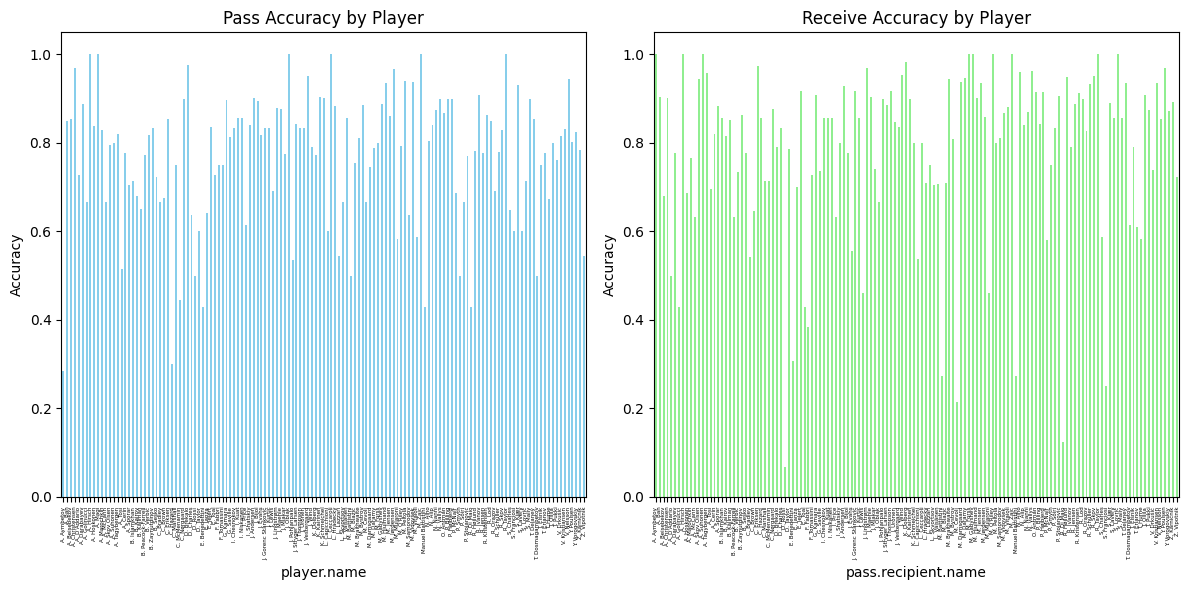

In [31]:
# # pass accuracy of player
# player_pass_accuracy = pass_data.groupby('player.name')['pass.accurate'].mean()

# # receive accuracy
# player_receive_accuracy = pass_data.groupby('pass.recipient.name')['pass.accurate'].mean()

# # visualize
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# player_pass_accuracy.plot(kind='bar', color='skyblue')
# plt.title('Pass Accuracy by Player')
# plt.ylabel('Accuracy')
# plt.tick_params(axis='x', labelsize=4)

# plt.subplot(1, 2, 2)
# player_receive_accuracy.plot(kind='bar', color='lightgreen')
# plt.title('Receive Accuracy by Player')
# plt.ylabel('Accuracy')
# plt.tick_params(axis='x', labelsize=4)

# plt.tight_layout()
# plt.show()

Pass.B Analyse the pass/receive accuracy of each position

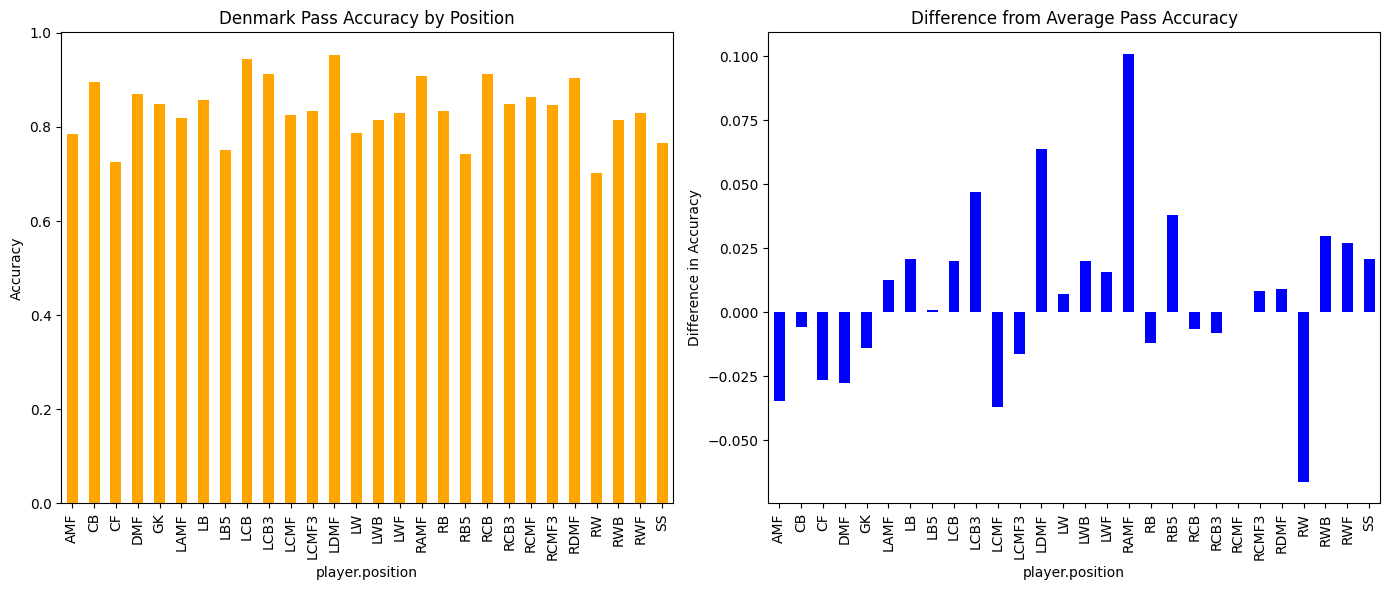

In [6]:

# # pass acc of position
# position_pass_accuracy = pass_data.groupby('player.position')['pass.accurate'].mean()

# # recv acc of position
# position_receive_accuracy = pass_data.groupby('pass.recipient.position')['pass.accurate'].mean()

# # plot
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# position_pass_accuracy.plot(kind='bar', color='orange')
# plt.title('Pass Accuracy by Position')
# plt.ylabel('Accuracy')

# plt.subplot(1, 2, 2)
# position_receive_accuracy.plot(kind='bar', color='purple')
# plt.title('Receive Accuracy by Position')
# plt.ylabel('Accuracy')

# plt.tight_layout()
# plt.show()

# all_acc_pass
all_position_pass_accuracy = pass_data_all.groupby('player.position')['pass.accurate'].mean()

# all_acc_recv
all_position_receive_accuracy = pass_data_all.groupby('pass.recipient.position')['pass.accurate'].mean()

position_pass_accuracy = pass_data.groupby('player.position')['pass.accurate'].mean()

position_receive_accuracy = pass_data.groupby('pass.recipient.position')['pass.accurate'].mean()

# fig1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
position_pass_accuracy.plot(kind='bar', color='orange')
plt.title('Denmark Pass Accuracy by Position')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
(position_pass_accuracy - all_position_pass_accuracy).plot(kind='bar', color='blue')
plt.title('Difference from Average Pass Accuracy')
plt.ylabel('Difference in Accuracy')

plt.tight_layout()
plt.show()


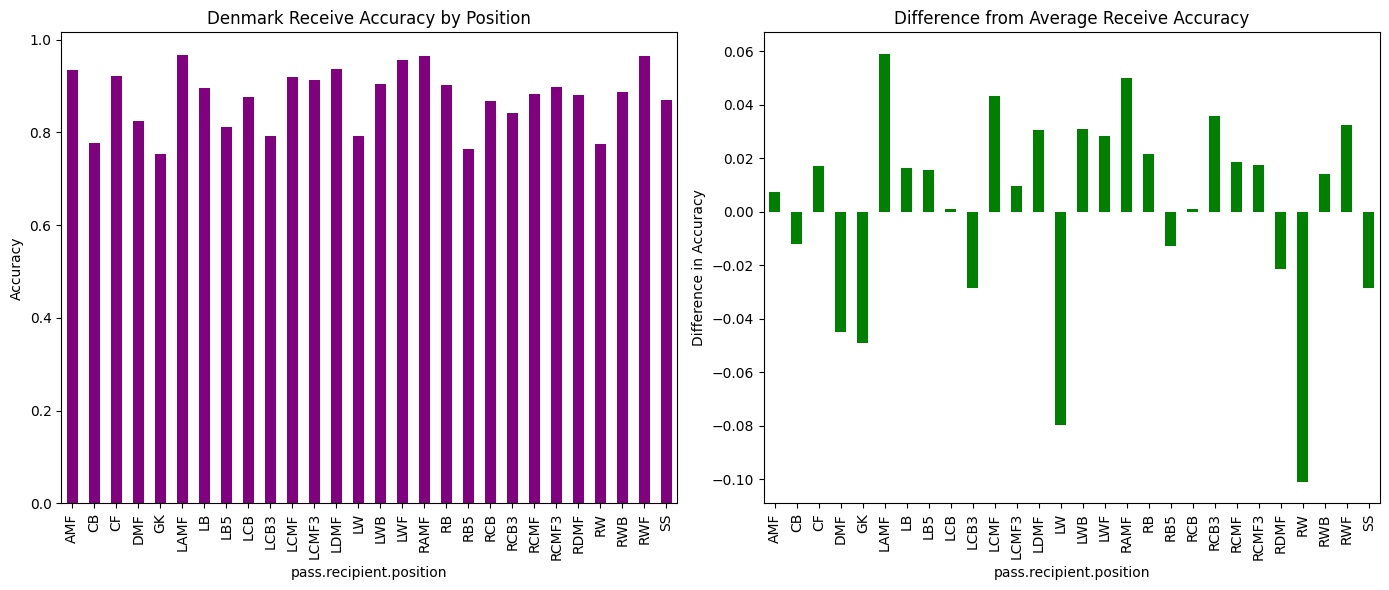

In [7]:

# fig2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
position_receive_accuracy.plot(kind='bar', color='purple')
plt.title('Denmark Receive Accuracy by Position')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
(position_receive_accuracy - all_position_receive_accuracy).plot(kind='bar', color='green')
plt.title('Difference from Average Receive Accuracy')
plt.ylabel('Difference in Accuracy')

plt.tight_layout()
plt.show()


Pass.C: pass acc of different range

C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3344505945.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_accuracy_by_length = pass_data.groupby('pass.length.category')['pass.accurate'].mean()
C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3344505945.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_pass_accuracy_by_length = pass_data_all.groupby('pass.length.category')['pass.accurate'].mean()


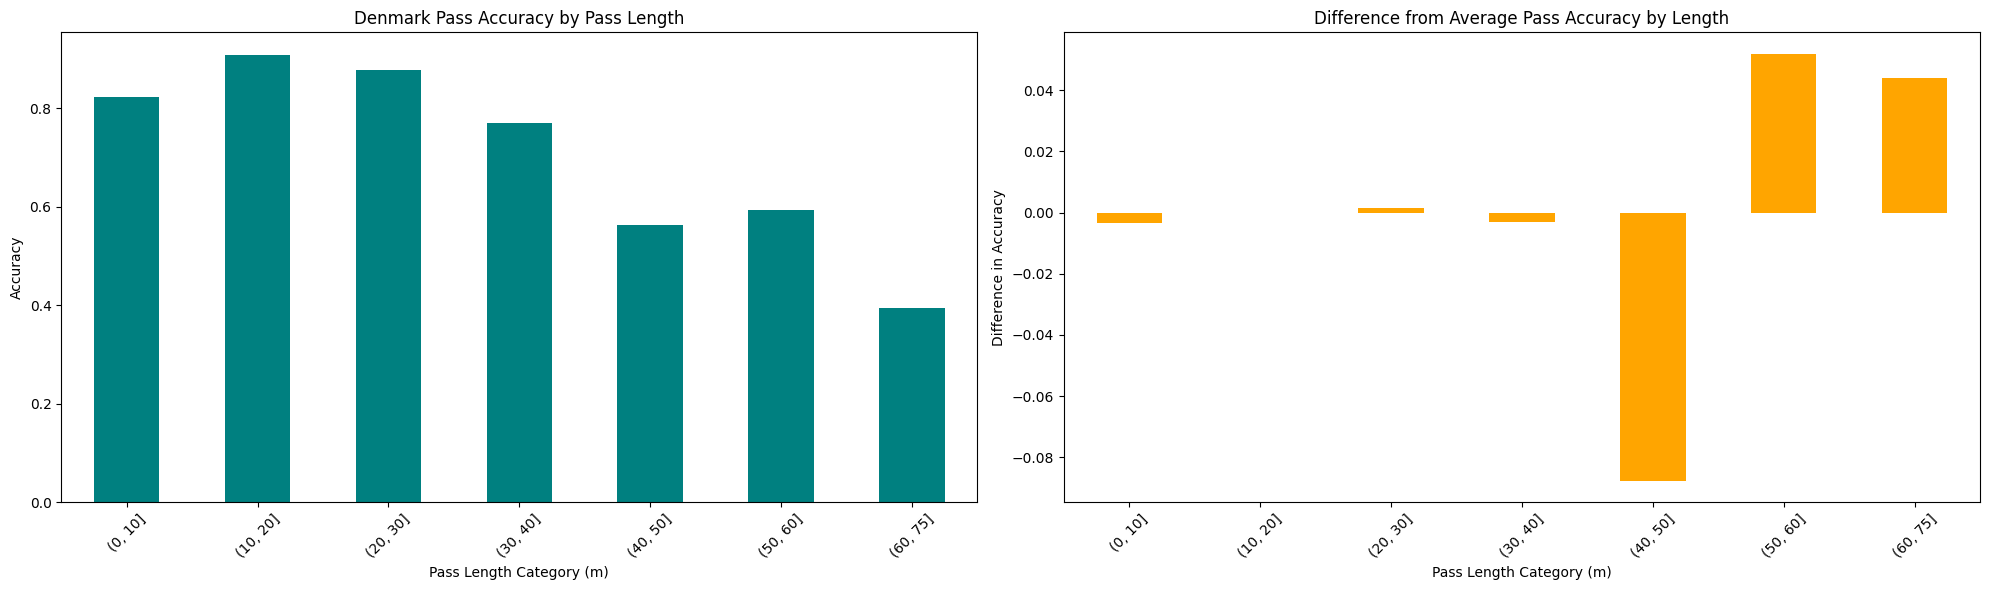

In [8]:
# # def of intervals
# bins = [0, 10, 20, 30, 40, 50, 60, 75]
# pass_data['pass.length.category'] = pd.cut(pass_data['pass.length'], bins)

# pass_accuracy_by_length = pass_data.groupby('pass.length.category')['pass.accurate'].mean()

# plt.figure(figsize=(10, 6))
# pass_accuracy_by_length.plot(kind='bar', color='teal')
# plt.title('Pass Accuracy by Pass Length')
# plt.ylabel('Accuracy')
# plt.xlabel('Pass Length Category (m)')
# plt.xticks(rotation=45)
# plt.show()
bins = [0, 10, 20, 30, 40, 50, 60, 75]
pass_data['pass.length.category'] = pd.cut(pass_data['pass.length'], bins)

pass_accuracy_by_length = pass_data.groupby('pass.length.category')['pass.accurate'].mean()

pass_data_all['pass.length.category'] = pd.cut(pass_data_all['pass.length'], bins)
all_pass_accuracy_by_length = pass_data_all.groupby('pass.length.category')['pass.accurate'].mean()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
pass_accuracy_by_length.plot(kind='bar', color='teal')
plt.title('Denmark Pass Accuracy by Pass Length')
plt.ylabel('Accuracy')
plt.xlabel('Pass Length Category (m)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
(pass_accuracy_by_length - all_pass_accuracy_by_length).plot(kind='bar', color='orange')
plt.title('Difference from Average Pass Accuracy by Length')
plt.ylabel('Difference in Accuracy')
plt.xlabel('Pass Length Category (m)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Pass.D: pass frequency heatmap 

C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3717515242.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_frequency_by_location = pass_data.groupby(['location.x.bin', 'location.y.bin']).size().unstack(fill_value=0) / len(denmark_game)
C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3717515242.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_pass_frequency_by_location = pass_data_all.groupby(['location.x.bin', 'location.y.bin']).size().unstack(fill_value=0) /len(all_game)


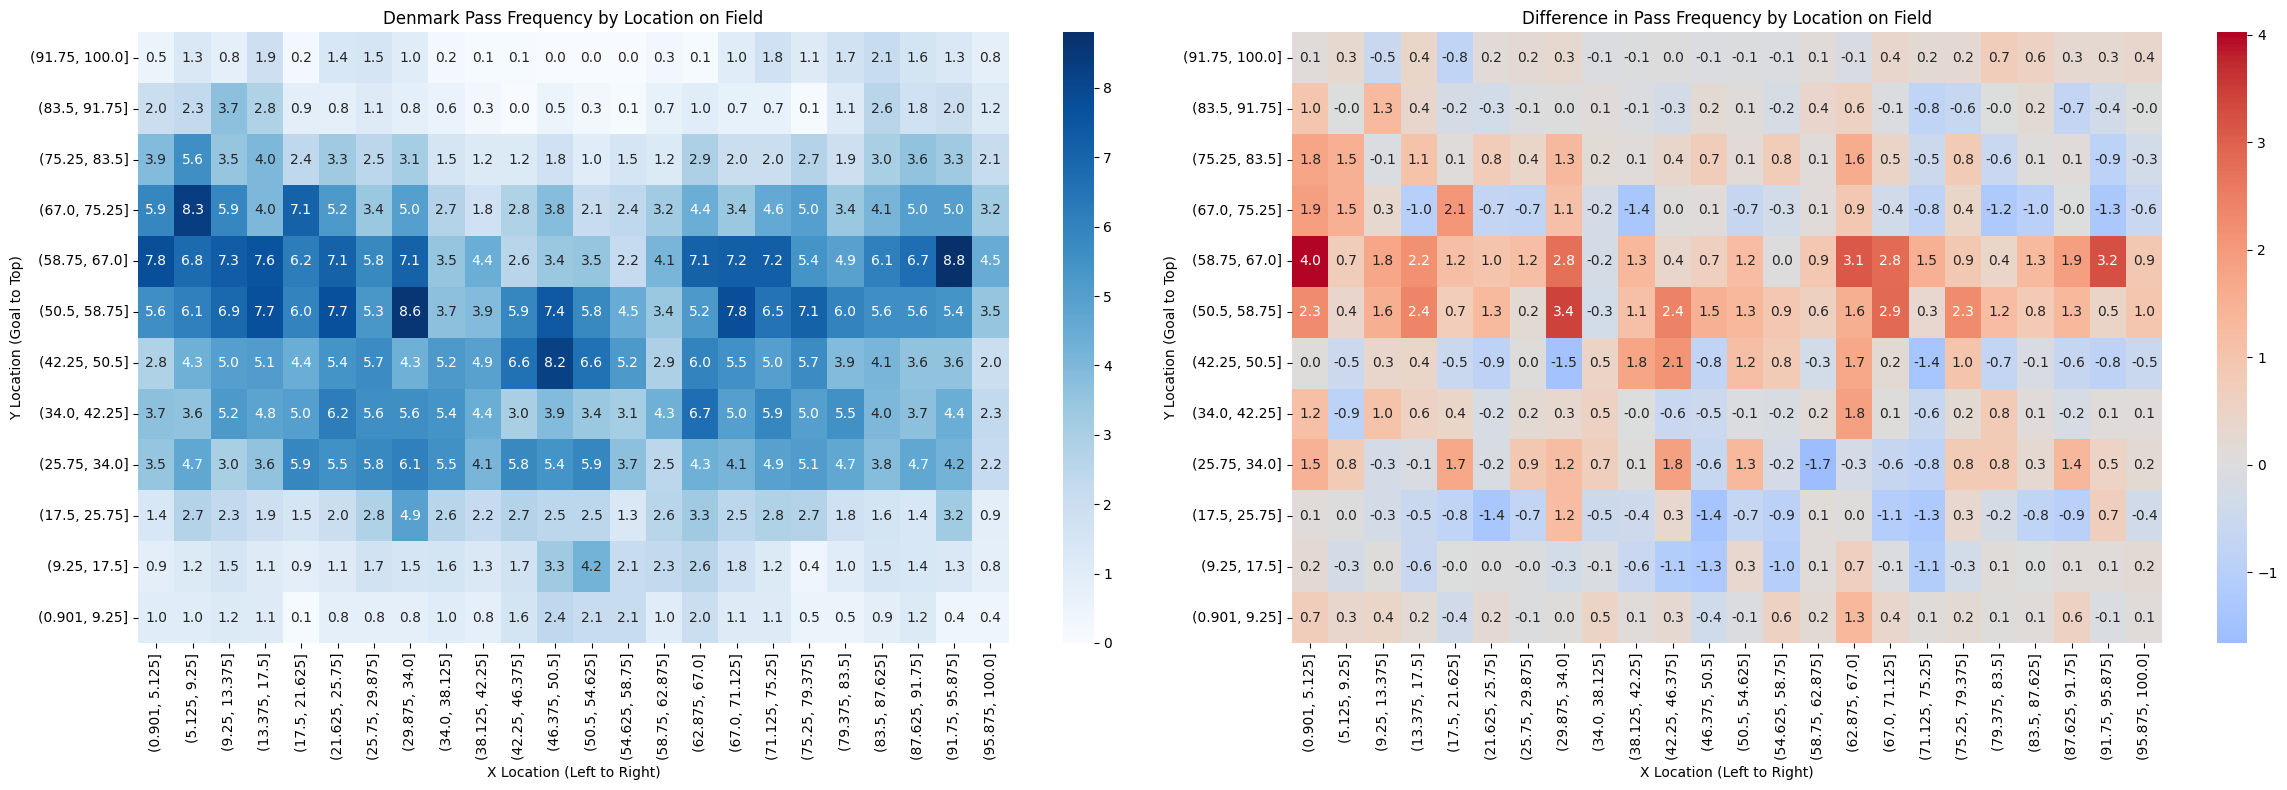

In [46]:
import seaborn as sns
# # make grid
# pass_data['location.x.bin'] = pd.cut(pass_data['location.x'], bins=12)  
# pass_data['location.y.bin'] = pd.cut(pass_data['location.y'], bins=24)  

# # calc acc
# pass_frequency_by_location = pass_data.groupby(['location.x.bin', 'location.y.bin']).size().unstack(fill_value=0)

# # plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(pass_frequency_by_location, annot=True, cmap='Blues', fmt='d')
# plt.title('Pass Frequency by Location on Field')
# plt.ylabel('Y Location')
# plt.xlabel('X Location')
# plt.gca().invert_yaxis()  
# plt.show()
pass_data['location.x.bin'] = pd.cut(pass_data['location.x'], bins=12)  
pass_data['location.y.bin'] = pd.cut(pass_data['location.y'], bins=24)  
pass_data_all['location.x.bin'] = pd.cut(pass_data_all['location.x'], bins=12)
pass_data_all['location.y.bin'] = pd.cut(pass_data_all['location.y'], bins=24)

pass_frequency_by_location = pass_data.groupby(['location.x.bin', 'location.y.bin']).size().unstack(fill_value=0) / len(denmark_game)
all_pass_frequency_by_location = pass_data_all.groupby(['location.x.bin', 'location.y.bin']).size().unstack(fill_value=0) /len(all_game)

difference_in_pass_frequency = pd.DataFrame(pass_frequency_by_location.values - all_pass_frequency_by_location.values, columns=pass_frequency_by_location.columns, index=pass_frequency_by_location.index)
difference_in_pass_frequency
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
sns.heatmap(pass_frequency_by_location, annot=True, cmap='Blues', fmt='.1f')
plt.title('Denmark Pass Frequency by Location on Field')
plt.ylabel('Y Location (Goal to Top)')
plt.xlabel('X Location (Left to Right)')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
sns.heatmap(difference_in_pass_frequency, annot=True, cmap='coolwarm', fmt='.1f', center=0)
plt.title('Difference in Pass Frequency by Location on Field')
plt.ylabel('Y Location (Goal to Top)')
plt.xlabel('X Location (Left to Right)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Pass.E: Pass acc heatmap on field

C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3913239455.py:10: FutureWarning: The provided callable <function mean at 0x0000022CA0DEA0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grid_accuracy = pass_data.pivot_table(values='pass.accurate', index='start_grid_x', columns='start_grid_y', aggfunc=np.mean)
C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3913239455.py:11: FutureWarning: The provided callable <function mean at 0x0000022CA0DEA0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grid_acc_all = pass_data_all.pivot_table(values='pass.accurate', index='start_grid_x', columns='start_grid_y', aggfunc=np.mean)
C:\Users\xin22\AppData\Local\Temp\ipykernel_206532\3913239455.py:12: FutureWarning: Downcasting object dt

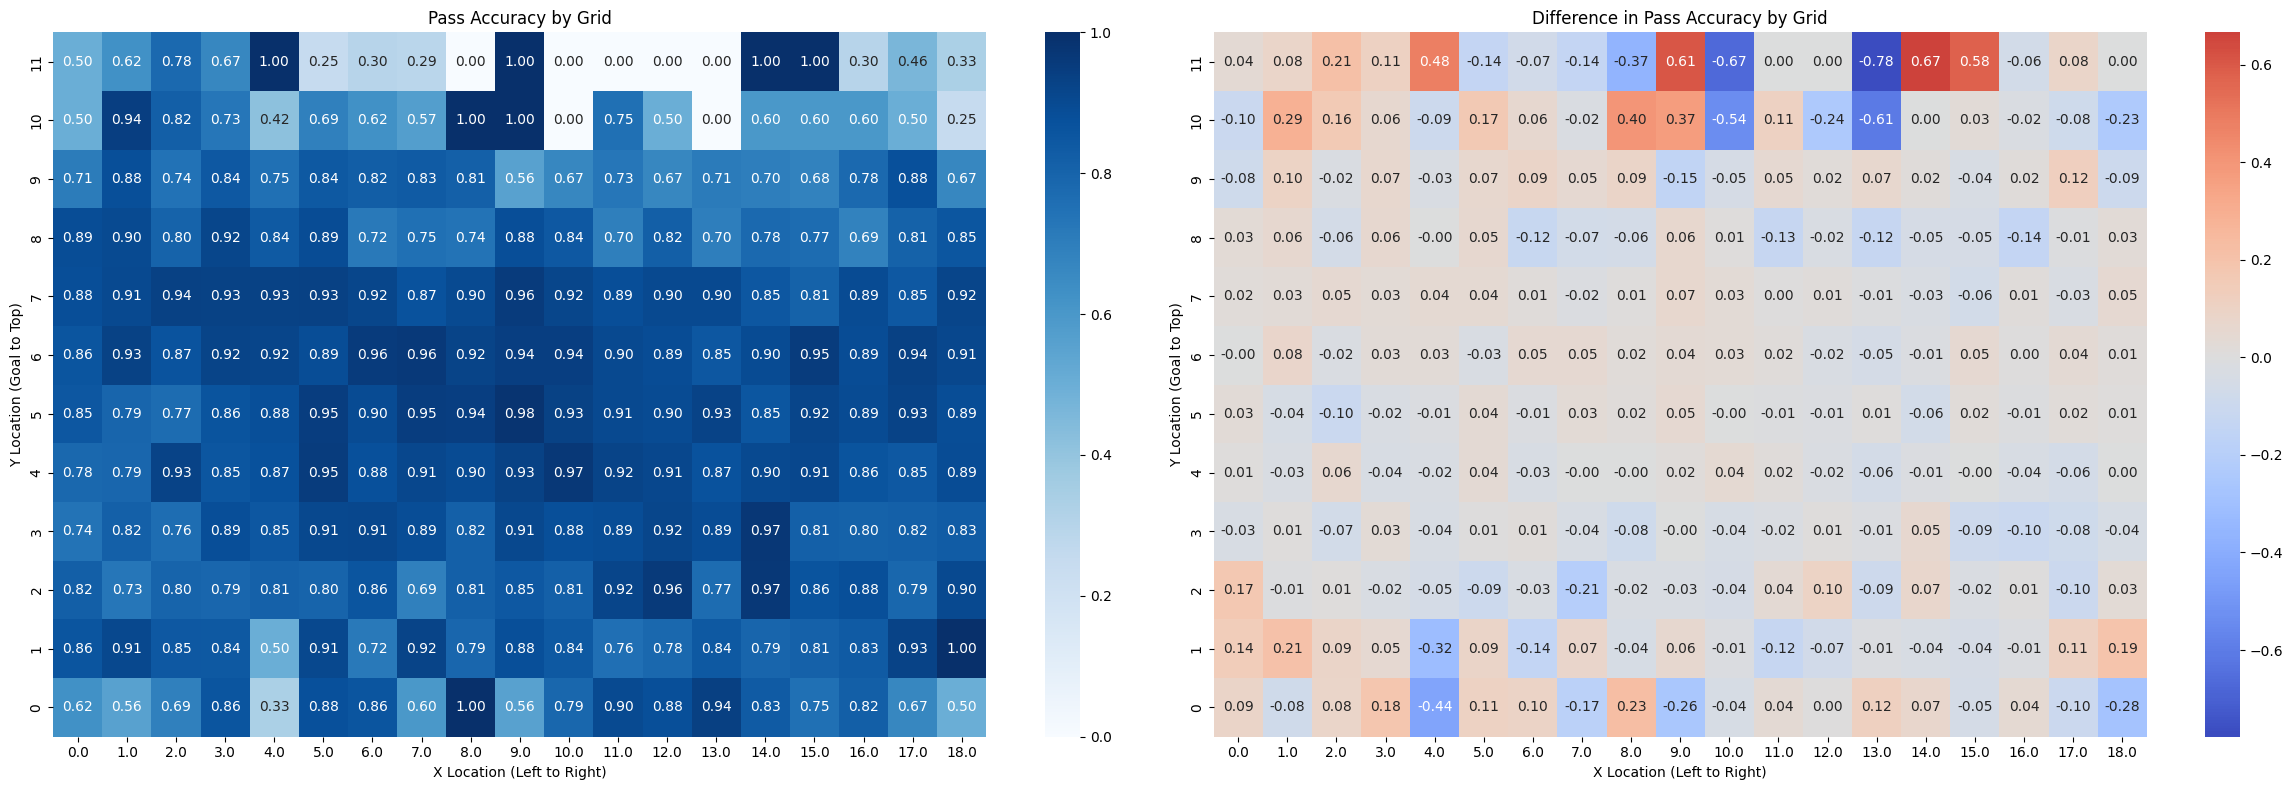

In [49]:
import numpy as np
# make grid
x_bins = np.linspace(0, 120, 15)  
y_bins = np.linspace(0, 80, 20)   

pass_data['start_grid_x'] = pd.cut(pass_data['location.x'], bins=x_bins, labels=False, include_lowest=True)
pass_data['start_grid_y'] = pd.cut(pass_data['location.y'], bins=y_bins, labels=False, include_lowest=True)
pass_data_all['start_grid_x'] = pd.cut(pass_data_all['location.x'], bins=x_bins, labels=False, include_lowest=True)
pass_data_all['start_grid_y'] = pd.cut(pass_data_all['location.y'], bins=y_bins, labels=False, include_lowest=True)
grid_accuracy = pass_data.pivot_table(values='pass.accurate', index='start_grid_x', columns='start_grid_y', aggfunc=np.mean)
grid_acc_all = pass_data_all.pivot_table(values='pass.accurate', index='start_grid_x', columns='start_grid_y', aggfunc=np.mean)
grid_accuracy.fillna(0, inplace=True)
grid_acc_all.fillna(0, inplace=True)
acc_diff = pd.DataFrame(grid_accuracy.values - grid_acc_all.values, columns=grid_accuracy.columns, index=grid_accuracy.index)



plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
sns.heatmap(grid_accuracy, cmap='Blues', annot=True, fmt=".2f")
plt.title('Pass Accuracy by Grid')
plt.xlabel('X Location (Left to Right)')
plt.ylabel('Y Location (Goal to Top)')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
sns.heatmap(acc_diff, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Difference in Pass Accuracy by Grid')
plt.ylabel('Y Location (Goal to Top)')
plt.xlabel('X Location (Left to Right)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()